<a href="https://colab.research.google.com/github/SADDLOVE/lab/blob/main/lab2/%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание по практике 2

In [6]:
!pip install pandas
!pip install seaborn

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

##Введение в описательную статистику

1. Выберите категориальную целевую переменную (**Y**)

2. Выберите переменную для анализа относительно категории (**X**)

3. Выведитие обобщенную статистическую информацию переменной (**X**)

2. Вычислите среднее, медиану, моду, минимум, максимум, стандартное отклонение относительно целевой пременной из файла Classification datasets в соответствии с вашим вариантом

3. Сделайте вывод относительно полученных результатов

p.s если у вас нет категориальных признаков - преобразуйте любой числовой в категориальный (https://pandas.pydata.org/docs/reference/api/pandas.cut.html). Важно **не** использовать преобразованный Y вместе с этим же X (то есть, если вы преобразовали возраст в категорию, то вы не моежет использовать возраст в качестве X и возраст категорию в качестве Y)

In [8]:
df = pd.read_csv("/content/crimes_against_women_2001-2014.csv")
df

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...,...
10672,832,Lakshadweep,Lakshadweep,2014,1,0,0,1,2,0,0
10673,833,Lakshadweep,Total District(s),2014,1,0,0,1,2,0,0
10674,834,Puducherry,Karaikal,2014,3,1,0,12,1,1,0
10675,835,Puducherry,Puducherry,2014,7,6,1,20,7,3,0


In [9]:
df['Rape'].describe() # ваш код здесь

count    10677.000000
mean        57.989885
std        214.230398
min          0.000000
25%          8.000000
50%         22.000000
75%         44.000000
max       5076.000000
Name: Rape, dtype: float64

In [10]:
# (среднее) ваш код здесь
mean = df['Rape'].mean()
mean

57.98988479910087

In [11]:
# (медиана) ваш код здесь
median = df['Rape'].median()
median

22.0

In [12]:
modes = df['Rape'].mode() # (мода) ваш код здесь
modes


0    0
Name: Rape, dtype: int64

In [13]:
# (минимум) ваш код здесь
min = df['Rape'].min()
min

0

In [14]:
max = df['Rape'].max() # (максимум) ваш код здесь
max

5076

In [15]:
std = df['Rape'].std() # (стандартное отклонение) Ваш код здесь
std

214.23039847185055

Вычислите следующие квантили: 25%, 50% (медиана), 75% для числового признака вашего датасета. Затем найдите интерквартильный размах.

In [16]:
q1 = df['Rape'].quantile(0.25) # (25% квантиль) ваш код здесь
q1

8.0

In [17]:
q2 =df['Rape'].quantile(0.50) # (50% квантиль) ваш код здесь
q2

22.0

In [18]:
q3 = df['Rape'].quantile(0.75) # (75% квантиль) ваш код здесь
q3

44.0

In [19]:
iqr = q3 - q1 # (интерквартильный размах) ваш код здесь
print(iqr)

36.0


Какие выводы можно сделать исходя из полученных статистических данных?

In [20]:
iqr = q3 - q1 # (интерквартильный размах) ваш код здесь
print(iqr)

agg = df.groupby(['Year']).agg({'Rape': ['mean', 'median', 'min', 'max', np.std, pd.Series.mode]})
print(agg)

36.0
           Rape                                  
           mean median min   max         std mode
Year                                             
2001  44.902235   17.0   0  2851  166.370759    0
2002  45.543811   16.0   0  2891  164.644685    0
2003  43.535714   15.0   0  2738  155.334608    0
2004  50.021948   18.0   0  2875  176.291240    0
2005  50.092769   18.0   0  2921  177.507045    0
2006  52.291892   21.0   0  2900  181.520979    0
2007  55.819650   22.0   0  3010  197.600641    0
2008  56.417871   22.0   0  2937  201.025617    0
2009  55.794003   22.0   0  2998  200.603155    0
2010  56.924262   22.0   0  3135  204.315002    0
2011  61.203540   23.0   0  3406  221.312495    0
2012  61.462392   24.0   0  3425  219.981828    0
2013  81.912515   32.0   0  4335  295.113537    0
2014  87.777778   34.0   0  5076  326.142623    0


In [24]:
df.Rape.unique()

array([  50,   23,   27,   20,    0,   54,   37,   56,   47,   29,   59,
         35,   46,   21,   19,   72,    8,   25,    1,   12,   13,   53,
         61,  871,    2,    9,    5,    4,   33,   28,   45,   48,   42,
         43,   30,   24,   14,   64,   51,    3,   41,  817,   93,   16,
         34,   10,   22,    6,   11,   44,   73,   40,    7,   15,   39,
        888,   17,   69,  144,   36,  104,   58,  145,  959,   18,   26,
        286,   32,   31,   38,  398,  124,  169,  567,  293,   55,   71,
         63,   57,  562,   87,   95,  106,   65,   66,   78,   68,   84,
        108,   70,   79,  141,   52,   90,   86,  112, 2851,  127,   81,
       1302,   77,  790,  298,   67, 1049,  423,  102,   83,   62,   85,
       1958,   74,  709,  381,  103,   99,   49, 1002,   60,  970,  101,
       1040,  132,  159,  142,  992,  267,  361,  137,  192,   76,  797,
        292,  499,  115,   98,   82,   97,  148,   80,   88,  136,  114,
       2891,  128, 1352,  691,  299, 1051,  534, 14

Присутствуют выбросы в датасете, судя по минимальным и максимальным значеням. Можно заметить, что median, mean, max и std растет из года в год.

##Основы визуализации

 Постройте гистограмму переменной (X) относительно категориального признака (Y) из своего датасета.

<Axes: xlabel='Rape', ylabel='Count'>

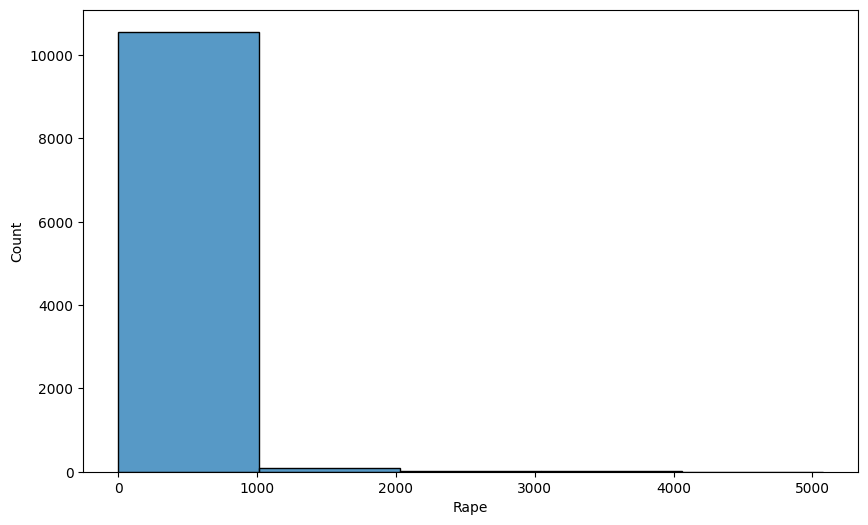

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(x='Rape', data=df, bins=5)

Постройте boxplot любого признака из своего датасета.

1) boxplot числовой переменной;

2) boxplot числовой переменной относительно категориальный переменной;

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

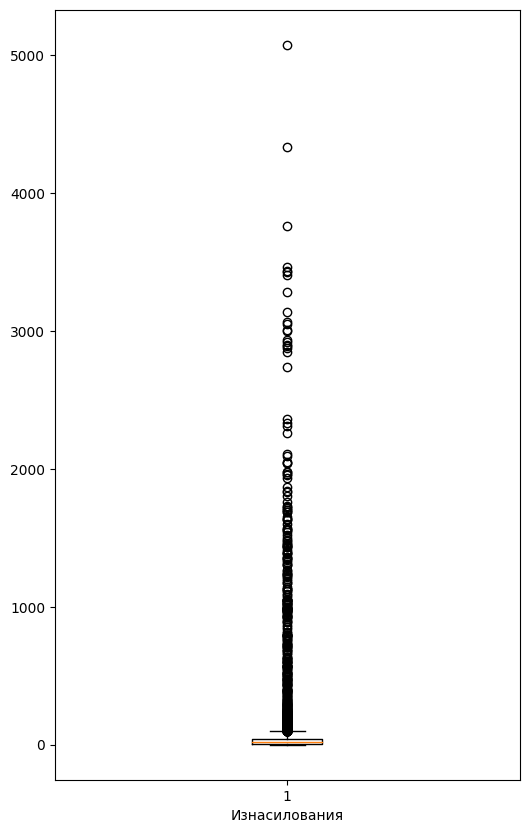

In [28]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 10))
plt.boxplot(df['Rape'])
plt.xlabel('Изнасилования')
plt.show()

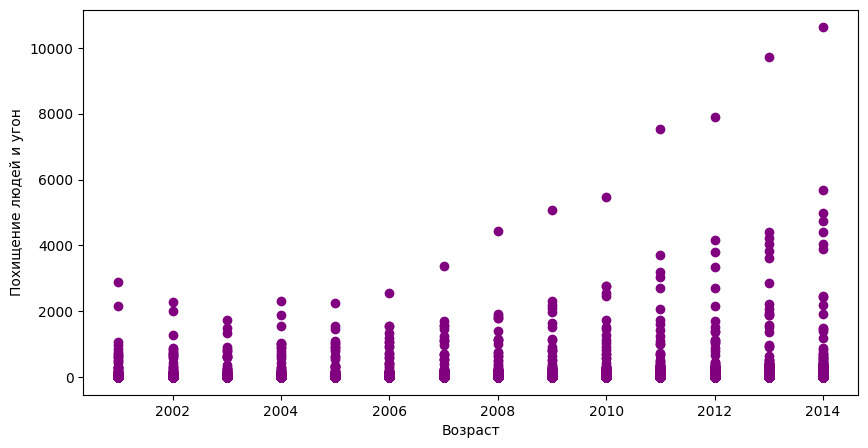

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df['Year'], df['Kidnapping and Abduction'], color='purple')
plt.xlabel('Возраст')
plt.ylabel('Похищение людей и угон')
plt.show()

Постройте диаграмму рассеивания для числовых признаков вашего датасета.

*p.s. Если у вас только один числовой признак, преобразуйте категориальный при помощи LabelEncoder (https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)*

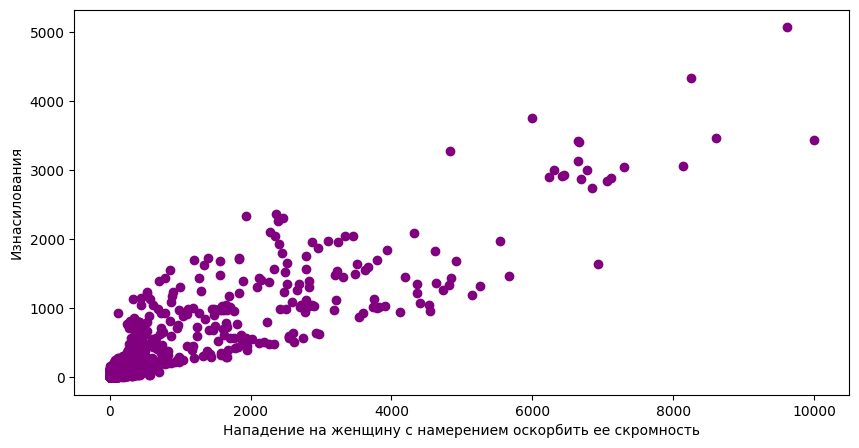

In [34]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df['Assault on women with intent to outrage her modesty'], df['Rape'], color='purple')
plt.xlabel('Нападение на женщину с намерением оскорбить ее скромность')
plt.ylabel('Изнасилования')

plt.show()

In [30]:
df.columns

Index(['Unnamed: 0', 'STATE/UT', 'DISTRICT', 'Year', 'Rape',
       'Kidnapping and Abduction', 'Dowry Deaths',
       'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

Постройте матрицу корреляции для двух числовых признаков вашего датасета.

<Axes: >

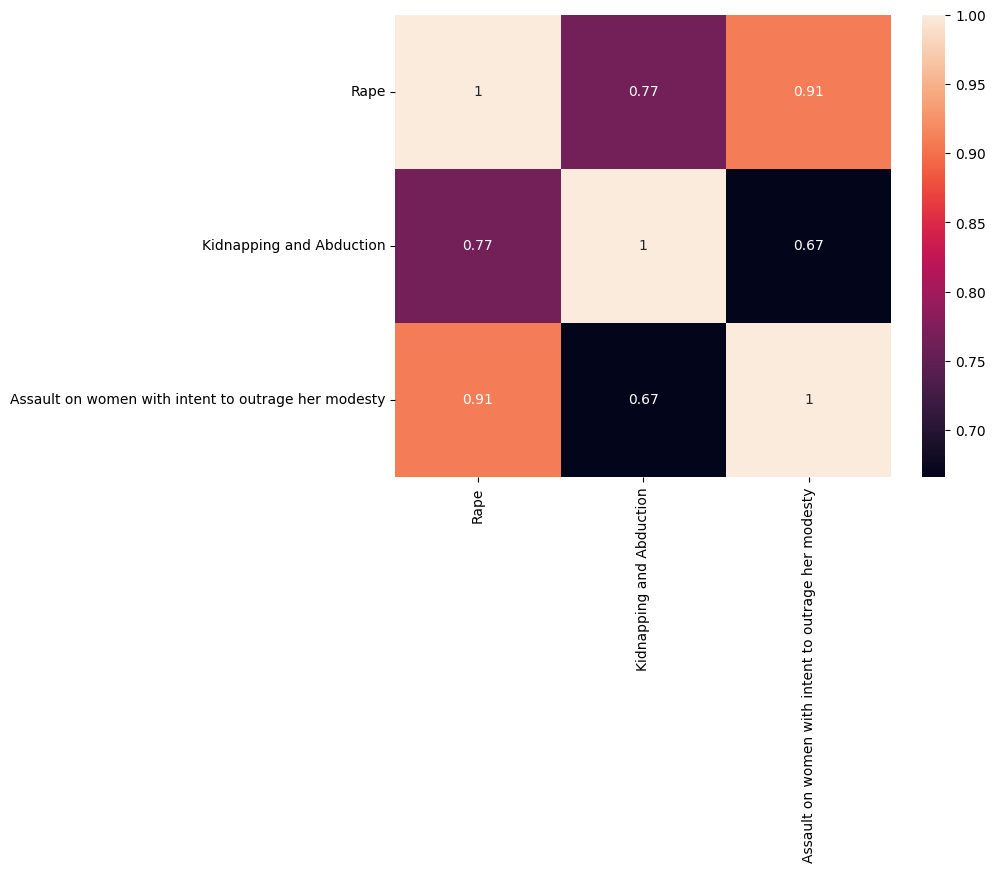

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df[['Rape', 'Kidnapping and Abduction', 'Assault on women with intent to outrage her modesty']]

corr_matrix = df1.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True)

Какие выводы можно сделать на основе графиков и матрицы корреляции?

Нет причин для похищения женщин. зачастую это делается с намерением оскорбить женскую скромность.

##Задание для гениев*

Реализовать следующие методы поиска выбросов:
1. На основе среднего и отклонения
2. Критерий Шовене
3. С помощью квартилей
4. Поиск выбросов по двум переменным

[Посмотреть](http://course.omgtu.ru/wp-content/uploads/2021/04/3_%D0%92%D1%8B%D0%B1%D1%80%D0%BE%D1%81%D1%8B.pdf)

P.S. в качестве возвразаемого значения методов может быть:
1. очищенный датафрейм
2. индексы выбросов ```df.series.index```

### Пример реализации одного метода